In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from scipy import stats
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import math

In [3]:
#reading training file
train = pd.read_csv('train.csv',index_col='ID_code')
test = pd.read_csv('test.csv',index_col='ID_code')
y = train['target'].copy()
train.drop('target',axis=1,inplace=True)

In [3]:
final_col_v1 = ['var_0', 'var_1', 'var_2', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_18', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_26', 'var_28', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_43', 'var_44', 'var_45', 'var_48', 'var_49', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_58', 'var_60', 'var_63', 'var_64', 'var_66', 'var_67', 'var_70', 'var_71', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_80', 'var_81', 'var_82', 'var_83', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_97', 'var_99', 'var_102', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_114', 'var_115', 'var_116', 'var_118', 'var_119', 'var_121', 'var_122', 'var_123', 'var_125', 'var_127', 'var_128', 'var_130', 'var_131', 'var_132', 'var_133','var_134', 'var_135', 'var_137', 'var_139', 'var_141', 'var_142', 'var_144', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_150', 'var_151', 'var_154', 'var_155', 'var_156','var_157', 'var_162', 'var_163', 'var_164', 'var_165', 'var_166', 'var_167', 'var_168', 'var_169','var_170', 'var_171', 'var_172', 'var_173','var_174', 'var_175', 'var_176', 'var_177', 'var_178', 'var_179', 'var_180', 'var_184', 'var_185', 'var_186', 'var_188', 'var_189', 'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196', 'var_197', 'var_198', 'var_199']
final_col_v2 = ['var_0', 'var_1','var_2','var_5','var_6','var_8','var_9','var_11', 'var_12', 'var_13', 'var_18', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_26', 'var_28', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_43', 'var_44', 'var_45', 'var_48', 'var_49', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_58', 'var_63', 'var_64', 'var_66', 'var_67', 'var_70', 'var_71', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_80', 'var_81', 'var_82', 'var_83', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_97', 'var_99', 'var_102', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_114', 'var_115', 'var_116', 'var_118', 'var_119', 'var_121', 'var_122', 'var_123', 'var_125', 'var_127', 'var_128', 'var_130', 'var_131', 'var_132', 'var_133', 'var_134', 'var_135', 'var_137', 'var_139', 'var_141', 'var_142', 'var_144', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_150', 'var_151', 'var_154', 'var_155', 'var_156', 'var_157', 'var_162', 'var_163', 'var_164', 'var_165', 'var_166', 'var_167', 'var_168', 'var_169', 'var_170', 'var_172', 'var_173', 'var_174', 'var_175', 'var_176', 'var_177', 'var_178', 'var_179', 'var_180', 'var_184', 'var_186', 'var_188', 'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196', 'var_197', 'var_198', 'var_199']
final_col_v3 = ['var_0', 'var_1', 'var_2', 'var_5', 'var_6', 'var_9', 'var_12', 'var_13', 'var_18', 'var_21', 'var_22', 'var_23', 'var_24', 'var_26', 'var_28', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_43', 'var_44', 'var_45', 'var_48', 'var_49', 'var_51', 'var_52', 'var_53', 'var_56', 'var_58', 'var_66', 'var_67', 'var_70', 'var_71', 'var_75', 'var_76', 'var_78', 'var_80', 'var_81', 'var_82', 'var_85', 'var_86', 'var_87', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_99', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_114', 'var_115', 'var_118', 'var_119', 'var_121', 'var_122', 'var_123', 'var_125', 'var_127', 'var_128', 'var_130', 'var_131', 'var_132', 'var_133', 'var_135', 'var_137', 'var_139', 'var_141', 'var_144', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_150', 'var_151', 'var_154', 'var_155', 'var_156', 'var_157', 'var_162', 'var_163', 'var_164', 'var_165', 'var_166', 'var_167', 'var_169', 'var_170', 'var_172', 'var_173', 'var_174', 'var_175', 'var_177', 'var_179', 'var_180', 'var_184', 'var_186', 'var_188', 'var_190', 'var_191', 'var_192', 'var_195', 'var_196', 'var_197', 'var_198', 'var_199']
final_col_v4 = ['var_0', 'var_1', 'var_2', 'var_5', 'var_6', 'var_9', 'var_12', 'var_13', 'var_18', 'var_21', 'var_22', 'var_23', 'var_24', 'var_26', 'var_28', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_43', 'var_44', 'var_48', 'var_49', 'var_51', 'var_52', 'var_53', 'var_56', 'var_58', 'var_67', 'var_70', 'var_71', 'var_75', 'var_76', 'var_78', 'var_80', 'var_81', 'var_82', 'var_85', 'var_86', 'var_87', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_99', 'var_104', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_114', 'var_115', 'var_118', 'var_119', 'var_121', 'var_122', 'var_123', 'var_125', 'var_127', 'var_128', 'var_130', 'var_131', 'var_132', 'var_133', 'var_135', 'var_137', 'var_139', 'var_141', 'var_145', 'var_146', 'var_147', 'var_148', 'var_149', 'var_150', 'var_151', 'var_154', 'var_155', 'var_156', 'var_157', 'var_162', 'var_163', 'var_164', 'var_165', 'var_166', 'var_167', 'var_169', 'var_170', 'var_172', 'var_173', 'var_174', 'var_175', 'var_177', 'var_179', 'var_180', 'var_184', 'var_186', 'var_188', 'var_190', 'var_191', 'var_192', 'var_195', 'var_196', 'var_197', 'var_198', 'var_199']

In [4]:
#target value distribution
y.value_counts()/y.shape[0]

0    0.89951
1    0.10049
Name: target, dtype: float64

In [5]:
def PlotConfusionMatrix(y_test,y_pred):
    cfn_matrix = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(5,5))
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',fmt='1',linewidths=0.5,annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

### Modelling

In [6]:
drop_col = []
def truncate(f, n):
    return math.floor(f * 10 ** n) / 10 ** n
for i in train.columns:
    temp1 = train[i][train.index.isin(y[y==1].index)].quantile([0.25,0.75]).apply(lambda x:truncate(x,2))
    temp2 = train[i][train.index.isin(y[y==0].index)].quantile([0.25,0.75]).apply(lambda x:truncate(x,2))
    if ((temp1==temp2).all()):
        drop_col.append(i)
train.drop(drop_col,axis=1,inplace=True)
test.drop(drop_col,axis=1,inplace=True)

In [7]:
model = lgb.LGBMClassifier(random_state=42,n_jobs=-1,is_unbalance=True)
selector = sfs(model,
           k_features='best',
           forward=False,
           floating=True,
           verbose=2,
           n_jobs=-1,
           scoring='roc_auc',
           cv=3)

selector = selector.fit(train, y)

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\NITIN\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\NITIN\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001B6A61E5F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\NITIN\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\N...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001B6A61E5F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\NITIN\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\N...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\NITIN\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\NITIN\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(908, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\NITIN\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(908, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (908, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=908, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 26, 7, 14, 32, 537182, tzinfo=tzutc()), 'msg_id': '75c27e956dc64e14b7bf6f639ab396b8', 'msg_type': 'execute_request', 'session': '00972e1ef8514bf1943a3c842c2bbffe', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '75c27e956dc64e14b7bf6f639ab396b8', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'00972e1ef8514bf1943a3c842c2bbffe']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 26, 7, 14, 32, 537182, tzinfo=tzutc()), 'msg_id': '75c27e956dc64e14b7bf6f639ab396b8', 'msg_type': 'execute_request', 'session': '00972e1ef8514bf1943a3c842c2bbffe', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '75c27e956dc64e14b7bf6f639ab396b8', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'00972e1ef8514bf1943a3c842c2bbffe'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 2, 26, 7, 14, 32, 537182, tzinfo=tzutc()), 'msg_id': '75c27e956dc64e14b7bf6f639ab396b8', 'msg_type': 'execute_request', 'session': '00972e1ef8514bf1943a3c842c2bbffe', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '75c27e956dc64e14b7bf6f639ab396b8', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-7-6a85cf381c72>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1b6ac166358, executio...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001B6ADE73D20, file "<ipython-input-7-6a85cf381c72>", line 11>
        result = <ExecutionResult object at 1b6ac166358, executio...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001B6ADE73D20, file "<ipython-input-7-6a85cf381c72>", line 11>, result=<ExecutionResult object at 1b6ac166358, executio...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001B6ADE73D20, file "<ipython-input-7-6a85cf381c72>", line 11>
        self.user_global_ns = {'In': ['', '#importing libraries\nimport pandas as pd\nimport ...port SequentialFeatureSelector as sfs\nimport math', '#importing libraries\nimport pandas as pd\nimport ...port SequentialFeatureSelector as sfs\nimport math', "#reading training file\ntrain = pd.read_csv('trai...].copy()\ntrain.drop('target',axis=1,inplace=True)", '#target value distribution\ny.value_counts()/y.shape[0]', "def PlotConfusionMatrix(y_test,y_pred):\n    cfn_...   plt.xlabel('Predicted Classes')\n    plt.show()", 'drop_col = []\ndef truncate(f, n):\n    return mat...ace=True)\ntest.drop(drop_col,axis=1,inplace=True)', 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)'], 'Out': {4: 0    0.89951
1    0.10049
Name: target, dtype: float64}, 'PlotConfusionMatrix': <function PlotConfusionMatrix>, 'RFECV': <class 'sklearn.feature_selection.rfe.RFECV'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, '_': 0    0.89951
1    0.10049
Name: target, dtype: float64, '_4': 0    0.89951
1    0.10049
Name: target, dtype: float64, '__': '', '___': '', ...}
        self.user_ns = {'In': ['', '#importing libraries\nimport pandas as pd\nimport ...port SequentialFeatureSelector as sfs\nimport math', '#importing libraries\nimport pandas as pd\nimport ...port SequentialFeatureSelector as sfs\nimport math', "#reading training file\ntrain = pd.read_csv('trai...].copy()\ntrain.drop('target',axis=1,inplace=True)", '#target value distribution\ny.value_counts()/y.shape[0]', "def PlotConfusionMatrix(y_test,y_pred):\n    cfn_...   plt.xlabel('Predicted Classes')\n    plt.show()", 'drop_col = []\ndef truncate(f, n):\n    return mat...ace=True)\ntest.drop(drop_col,axis=1,inplace=True)', 'model = lgb.LGBMClassifier(random_state=42,n_job...         cv=3)\n\nselector = selector.fit(train, y)'], 'Out': {4: 0    0.89951
1    0.10049
Name: target, dtype: float64}, 'PlotConfusionMatrix': <function PlotConfusionMatrix>, 'RFECV': <class 'sklearn.feature_selection.rfe.RFECV'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, '_': 0    0.89951
1    0.10049
Name: target, dtype: float64, '_4': 0    0.89951
1    0.10049
Name: target, dtype: float64, '__': '', '___': '', ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\NITIN\Desktop\Gaurav Projects\machine-learning\Kaggle\santander-customer-transaction-prediction\<ipython-input-7-6a85cf381c72> in <module>()
      6            verbose=2,
      7            n_jobs=-1,
      8            scoring='roc_auc',
      9            cv=3)
     10 
---> 11 selector = selector.fit(train, y)

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py in fit(self=SequentialFeatureSelector(clone_estimator=True, ...ispatch='2*n_jobs', scoring='roc_auc', verbose=2), X=                var_0   var_1    var_2    var_3 ...  12.1284   0.1385  

[200000 rows x 197 columns], y=ID_code
train_0         0
train_1         0
trai...9    0
Name: target, Length: 200000, dtype: int64, custom_feature_names=None, **fit_params={})
    352 
    353                     k_idx, k_score, cv_scores = self._exclusion(
    354                         feature_set=prev_subset,
    355                         X=X,
    356                         y=y,
--> 357                         **fit_params
        fit_params = {}
    358                     )
    359 
    360                 if self.floating:
    361 

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py in _exclusion(self=SequentialFeatureSelector(clone_estimator=True, ...ispatch='2*n_jobs', scoring='roc_auc', verbose=2), feature_set={0, 1, 2, 3, 4, 5, ...}, X=                var_0   var_1    var_2    var_3 ...  12.1284   0.1385  

[200000 rows x 197 columns], y=ID_code
train_0         0
train_1         0
trai...9    0
Name: target, Length: 200000, dtype: int64, fixed_feature=None, **fit_params={})
    527             features = n
    528             n_jobs = min(self.n_jobs, features)
    529             parallel = Parallel(n_jobs=n_jobs, verbose=self.verbose,
    530                                 pre_dispatch=self.pre_dispatch)
    531             work = parallel(delayed(_calc_score)(self, X, y, p, **fit_params)
--> 532                             for p in combinations(feature_set, r=n - 1)
        p = undefined
        feature_set = {0, 1, 2, 3, 4, 5, ...}
        n = 197
    533                             if not fixed_feature or fixed_feature in set(p))
    534 
    535             for p, cv_scores in work:
    536 

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object SequentialFeatureSelector._exclusion.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Tue Feb 26 12:45:11 2019
PID: 12220                Python 3.6.5: C:\Users\NITIN\Anaconda3\python.exe
...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _calc_score>, (SequentialFeatureSelector(clone_estimator=True, ...ispatch='2*n_jobs', scoring='roc_auc', verbose=2),                 var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns], ID_code
train_0         0
train_1         0
trai...9    0
Name: target, Length: 200000, dtype: int64, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...)), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _calc_score>
        args = (SequentialFeatureSelector(clone_estimator=True, ...ispatch='2*n_jobs', scoring='roc_auc', verbose=2),                 var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns], ID_code
train_0         0
train_1         0
trai...9    0
Name: target, Length: 200000, dtype: int64, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...))
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py in _calc_score(selector=SequentialFeatureSelector(clone_estimator=True, ...ispatch='2*n_jobs', scoring='roc_auc', verbose=2), X=                var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns], y=ID_code
train_0         0
train_1         0
trai...9    0
Name: target, Length: 200000, dtype: int64, indices=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...), **fit_params={})
     24 
     25 
     26 def _calc_score(selector, X, y, indices, **fit_params):
     27     if selector.cv:
     28         scores = cross_val_score(selector.est_,
---> 29                                  X[:, indices], y,
        X =                 var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns]
        indices = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...)
        y = ID_code
train_0         0
train_1         0
trai...9    0
Name: target, Length: 200000, dtype: int64
     30                                  cv=selector.cv,
     31                                  scoring=selector.scorer,
     32                                  n_jobs=1,
     33                                  pre_dispatch=selector.pre_dispatch,

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\pandas\core\frame.py in __getitem__(self=                var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns], key=(slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...)))
   2680         elif isinstance(key, DataFrame):
   2681             return self._getitem_frame(key)
   2682         elif is_mi_columns:
   2683             return self._getitem_multilevel(key)
   2684         else:
-> 2685             return self._getitem_column(key)
        self._getitem_column = <bound method DataFrame._getitem_column of      ...7  12.1284   0.1385

[200000 rows x 197 columns]>
        key = (slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...))
   2686 
   2687     def _getitem_column(self, key):
   2688         """ return the actual column """
   2689 

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\pandas\core\frame.py in _getitem_column(self=                var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns], key=(slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...)))
   2687     def _getitem_column(self, key):
   2688         """ return the actual column """
   2689 
   2690         # get column
   2691         if self.columns.is_unique:
-> 2692             return self._get_item_cache(key)
        self._get_item_cache = <bound method NDFrame._get_item_cache of        ...7  12.1284   0.1385

[200000 rows x 197 columns]>
        key = (slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...))
   2693 
   2694         # duplicate columns & possible reduce dimensionality
   2695         result = self._constructor(self._data.get(key))
   2696         if result.columns.is_unique:

...........................................................................
C:\Users\NITIN\Anaconda3\lib\site-packages\pandas\core\generic.py in _get_item_cache(self=                var_0   var_1    var_2    var_3 ...57  12.1284   0.1385

[200000 rows x 197 columns], item=(slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...)))
   2479         return self._get_item_cache(item)
   2480 
   2481     def _get_item_cache(self, item):
   2482         """Return the cached item, item represents a label indexer."""
   2483         cache = self._item_cache
-> 2484         res = cache.get(item)
        res = undefined
        cache.get = <built-in method get of dict object>
        item = (slice(None, None, None), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...))
   2485         if res is None:
   2486             values = self._data.get(item)
   2487             res = self._box_item_values(item, values)
   2488             cache[item] = res

TypeError: unhashable type: 'slice'
___________________________________________________________________________

In [7]:
X_train = train.values
y_train = y.values
cv = StratifiedKFold(n_splits=4,shuffle=True,random_state=423)
score = []
for train_index, test_index in cv.split(X_train, y_train):
    #model = lgb.LGBMClassifier(random_state=42,n_jobs=-1,is_unbalance=True ,n_estimators=400,max_depth=15,boosting_type='goss')
    model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.4836139202530177, feature_fraction=0.1,
        importance_type='split', is_unbalance=True, learning_rate=0.1,
        max_depth=20, metric='None', min_child_samples=153,
        min_child_weight=1e-05, min_split_gain=0.0, n_estimators=774,
        n_jobs=-1, num_leaves=10, objective=None, random_state=314,
        reg_alpha=2, reg_lambda=0.1, silent=True,
        subsample=0.616047295067836, subsample_for_bin=200000,
        subsample_freq=0)
    model.fit(X_train[train_index,:],y_train[train_index])
    y_pred = model.predict_proba(X_train[test_index,:])[:,1]
    score.append(roc_auc_score(y_train[test_index],y_pred))
print(mean(score))#0.8795654978506324

0.8928608866237437


In [ ]:
# all_data 
# 0.8658718719762682
# v_1
# 0.8663966427859138,0.8838306405601136
# v_2
# 0.8663467692869586,0.883848486081229
# v_3
# 0.8656332947057921,0.8808324627907758
# v_4
# 0.8654127136284722,0.8803006942093164

### Submission

In [8]:
# model = lgb.LGBMClassifier(random_state=42,n_jobs=-1,is_unbalance=True,learning_rate=0.14,n_estimators=225,max_depth=25)
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.4836139202530177, feature_fraction=0.1,
        importance_type='split', is_unbalance=True, learning_rate=0.1,
        max_depth=20, metric='None', min_child_samples=153,
        min_child_weight=1e-05, min_split_gain=0.0, n_estimators=774,
        n_jobs=-1, num_leaves=10, objective=None, random_state=314,
        reg_alpha=2, reg_lambda=0.1, silent=True,
        subsample=0.616047295067836, subsample_for_bin=200000,
        subsample_freq=0)
model.fit(train,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.4836139202530177, feature_fraction=0.1,
        importance_type='split', is_unbalance=True, learning_rate=0.1,
        max_depth=20, metric='None', min_child_samples=153,
        min_child_weight=1e-05, min_split_gain=0.0, n_estimators=774,
        n_jobs=-1, num_leaves=10, objective=None, random_state=314,
        reg_alpha=2, reg_lambda=0.1, silent=True,
        subsample=0.616047295067836, subsample_for_bin=200000,
        subsample_freq=0)

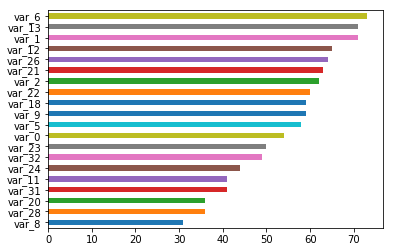

In [20]:
feature_imp = pd.Series(index= train.columns,data=model.feature_importances_)
feature_imp.head(20).sort_values().plot(kind='barh')

In [50]:
prediction= model.predict_proba(test)[:,1]
test_submit = pd.read_csv('test.csv')

In [51]:
submission = test_submit[['ID_code']].copy()
submission['target'] = prediction
submission.to_csv('submission_v10.csv', index=False)